In [4]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
today_date = pd.to_datetime("today").normalize()
today_date_str = today_date.strftime("%Y%m%d")
print(today_date_str)

20250916


In [6]:
#df = pd.read_csv('data.csv')
df = ak.fund_etf_hist_em(symbol="512890", period="daily", start_date="20190101", end_date=today_date_str, adjust="hfq")
df["日期"] = pd.to_datetime(df["日期"])
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2019-01-18,0.998,1.003,1.004,0.995,3244583,324300576.0,0.90,0.20,0.002,1.87
1,2019-01-21,1.003,1.003,1.009,1.002,765523,77018053.0,0.70,0.00,0.000,0.44
2,2019-01-22,1.004,1.000,1.006,0.999,150599,15106892.0,0.70,-0.30,-0.003,0.09
3,2019-01-23,1.001,1.003,1.005,0.999,174368,17497300.0,0.60,0.30,0.003,0.10
4,2019-01-24,1.004,1.006,1.008,1.002,310159,31218191.0,0.60,0.30,0.003,0.18
...,...,...,...,...,...,...,...,...,...,...,...
1611,2025-09-10,2.376,2.376,2.382,2.368,2204608,261803593.0,0.59,-0.25,-0.006,1.27
1612,2025-09-11,2.376,2.384,2.384,2.360,3333541,395039730.0,1.01,0.34,0.008,1.92
1613,2025-09-12,2.380,2.368,2.388,2.364,3039295,361186499.0,1.01,-0.67,-0.016,1.75
1614,2025-09-15,2.368,2.348,2.368,2.342,4383281,515561215.0,1.10,-0.84,-0.020,2.52


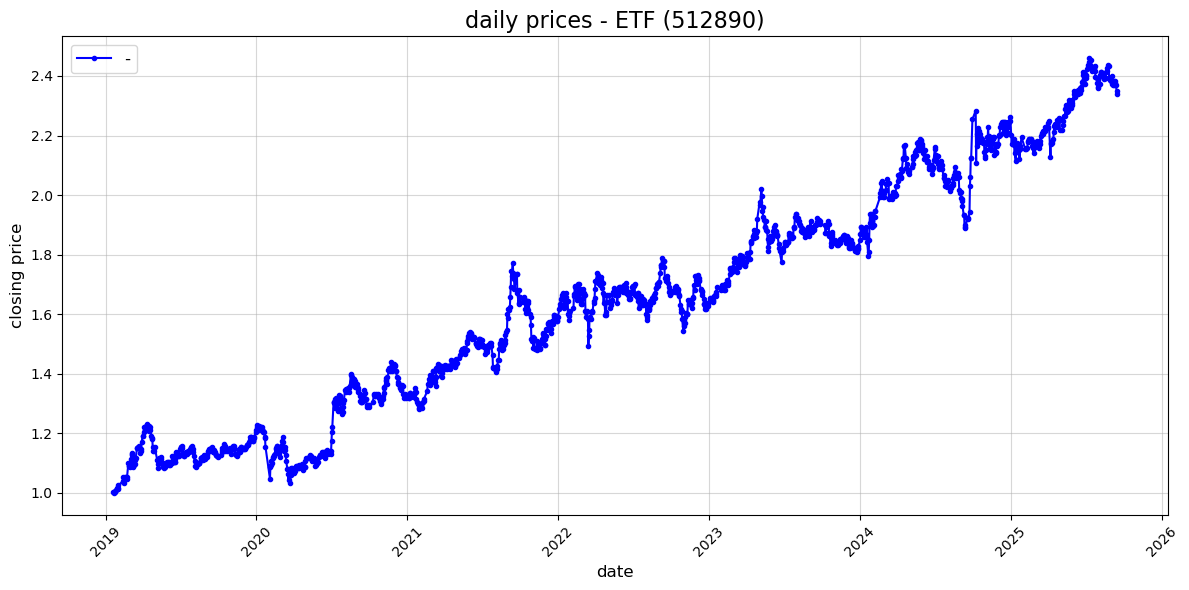

In [7]:
# 绘制每日收盘价格曲线
plt.figure(figsize=(12, 6))
plt.plot(df["日期"], df["收盘"], marker='.', linestyle='-', color='b', label="-")
plt.title("daily prices - ETF (512890)", fontsize=16)
plt.xlabel("date", fontsize=12)
plt.ylabel("closing price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

# 2. 数据分析与估值

In [8]:
df["days"] = (df["日期"] - df["日期"].iloc[0]).dt.days
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,days
0,2019-01-18,0.998,1.003,1.004,0.995,3244583,324300576.0,0.90,0.20,0.002,1.87,0
1,2019-01-21,1.003,1.003,1.009,1.002,765523,77018053.0,0.70,0.00,0.000,0.44,3
2,2019-01-22,1.004,1.000,1.006,0.999,150599,15106892.0,0.70,-0.30,-0.003,0.09,4
3,2019-01-23,1.001,1.003,1.005,0.999,174368,17497300.0,0.60,0.30,0.003,0.10,5
4,2019-01-24,1.004,1.006,1.008,1.002,310159,31218191.0,0.60,0.30,0.003,0.18,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2025-09-10,2.376,2.376,2.382,2.368,2204608,261803593.0,0.59,-0.25,-0.006,1.27,2427
1612,2025-09-11,2.376,2.384,2.384,2.360,3333541,395039730.0,1.01,0.34,0.008,1.92,2428
1613,2025-09-12,2.380,2.368,2.388,2.364,3039295,361186499.0,1.01,-0.67,-0.016,1.75,2429
1614,2025-09-15,2.368,2.348,2.368,2.342,4383281,515561215.0,1.10,-0.84,-0.020,2.52,2432


In [9]:
def fit_trend_and_deviation(df, start_date, duration):
    start_date = pd.to_datetime(start_date)
    end_date = start_date + timedelta(days = duration)

    filtered_df = df[(df["日期"]>= start_date) & (df["日期"] <=end_date)]

    if filtered_df.empty:
        print("no valid data.")
        return None

    X = filtered_df["days"].values.reshape(-1,1)
    y = filtered_df["收盘"].values

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, model.predict(X))

    y_pred = model.predict(X)
    deviation = y - y_pred

    mean_deviation = np.mean(deviation)
    std_deviation = np.std(deviation)

    print(f"拟合结果: 斜率={slope:.6f}, 截距={intercept:.4f}, r2={r2:.4f}")
    print(f"偏差均值={mean_deviation:.4f}, 标准差={std_deviation:.4f}")

    plt.figure(figsize=(12, 6))
    plt.hist(deviation, bins=30, alpha=0.7, label="distribution", color="blue", edgecolor="black", density=True)
    plt.axvline(std_deviation, color="red", linestyle="--", label="1-std positive_bias")
    plt.axvline(-std_deviation, color="green", linestyle="--", label="1-std negative_bias")
    plt.title("distribution of the price", fontsize=16)
    plt.xlabel("difference", fontsize=12)
    plt.ylabel("density", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()

    return model, slope, intercept, r2, mean_deviation, std_deviation

In [10]:
# today_date = pd.to_datetime("today").normalize()

duration = 365 * 2

# start_date = pd.to_datetime("2020-01-01")
start_date = today_date - timedelta(days = duration + 20)

end_date = start_date + timedelta(days = duration)
print(f"start_date:{start_date}, end_date:{end_date}, today:{today_date}")

start_date:2023-08-28 00:00:00, end_date:2025-08-27 00:00:00, today:2025-09-16 00:00:00


拟合结果: 斜率=0.000748, 截距=0.5728, r2=0.8458
偏差均值=-0.0000, 标准差=0.0678


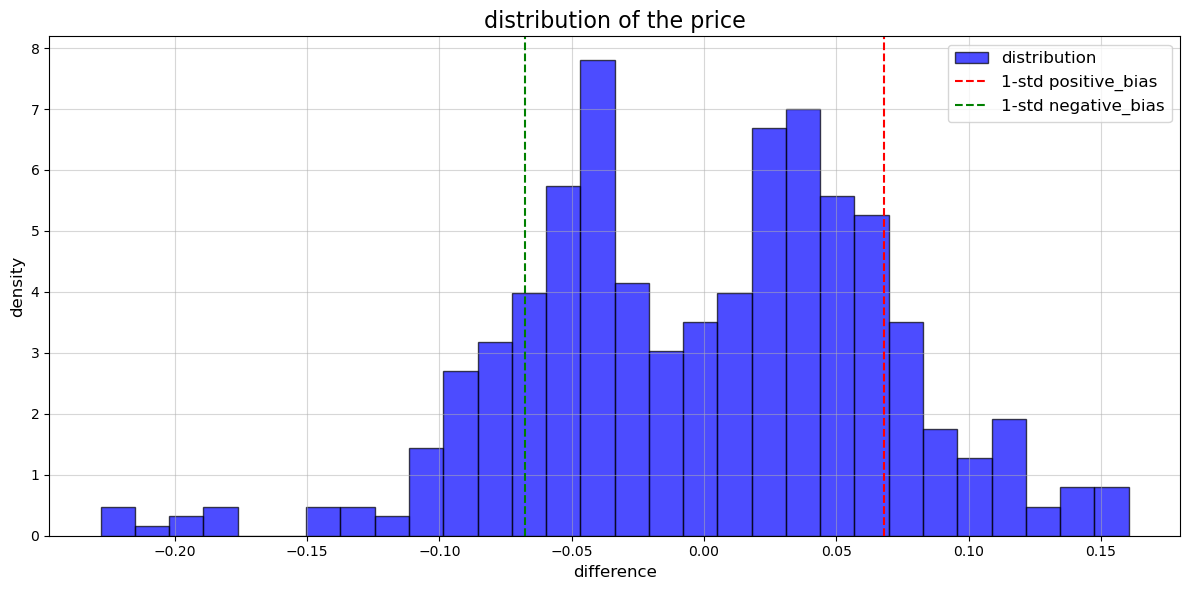

In [11]:
model, slope, intercept, r2, bias_mean, bias_std = fit_trend_and_deviation(df, start_date, duration)

In [12]:
X = df["days"].values.reshape(-1,1)
df["y_pred"] = model.predict(X)
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,days,y_pred
0,2019-01-18,0.998,1.003,1.004,0.995,3244583,324300576.0,0.90,0.20,0.002,1.87,0,0.572779
1,2019-01-21,1.003,1.003,1.009,1.002,765523,77018053.0,0.70,0.00,0.000,0.44,3,0.575023
2,2019-01-22,1.004,1.000,1.006,0.999,150599,15106892.0,0.70,-0.30,-0.003,0.09,4,0.575771
3,2019-01-23,1.001,1.003,1.005,0.999,174368,17497300.0,0.60,0.30,0.003,0.10,5,0.576519
4,2019-01-24,1.004,1.006,1.008,1.002,310159,31218191.0,0.60,0.30,0.003,0.18,6,0.577267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2025-09-10,2.376,2.376,2.382,2.368,2204608,261803593.0,0.59,-0.25,-0.006,1.27,2427,2.388341
1612,2025-09-11,2.376,2.384,2.384,2.360,3333541,395039730.0,1.01,0.34,0.008,1.92,2428,2.389089
1613,2025-09-12,2.380,2.368,2.388,2.364,3039295,361186499.0,1.01,-0.67,-0.016,1.75,2429,2.389837
1614,2025-09-15,2.368,2.348,2.368,2.342,4383281,515561215.0,1.10,-0.84,-0.020,2.52,2432,2.392081


In [13]:
days_to_predict = np.array([30, 90, 365, 730, 1095]).reshape(-1, 1)
model.predict(days_to_predict)

array([0.59522074, 0.64010485, 0.84582368, 1.11886867, 1.39191366])

In [14]:
df["positive_bias"] = df["y_pred"] * (1 + bias_std)
df["negative_bias"] = df["y_pred"] * (1 - bias_std)
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,days,y_pred,positive_bias,negative_bias
0,2019-01-18,0.998,1.003,1.004,0.995,3244583,324300576.0,0.90,0.20,0.002,1.87,0,0.572779,0.611620,0.533937
1,2019-01-21,1.003,1.003,1.009,1.002,765523,77018053.0,0.70,0.00,0.000,0.44,3,0.575023,0.614017,0.536029
2,2019-01-22,1.004,1.000,1.006,0.999,150599,15106892.0,0.70,-0.30,-0.003,0.09,4,0.575771,0.614815,0.536727
3,2019-01-23,1.001,1.003,1.005,0.999,174368,17497300.0,0.60,0.30,0.003,0.10,5,0.576519,0.615614,0.537424
4,2019-01-24,1.004,1.006,1.008,1.002,310159,31218191.0,0.60,0.30,0.003,0.18,6,0.577267,0.616413,0.538121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2025-09-10,2.376,2.376,2.382,2.368,2204608,261803593.0,0.59,-0.25,-0.006,1.27,2427,2.388341,2.550300,2.226382
1612,2025-09-11,2.376,2.384,2.384,2.360,3333541,395039730.0,1.01,0.34,0.008,1.92,2428,2.389089,2.551099,2.227079
1613,2025-09-12,2.380,2.368,2.388,2.364,3039295,361186499.0,1.01,-0.67,-0.016,1.75,2429,2.389837,2.551897,2.227777
1614,2025-09-15,2.368,2.348,2.368,2.342,4383281,515561215.0,1.10,-0.84,-0.020,2.52,2432,2.392081,2.554294,2.229869


In [15]:
y_pred, positive_bias, negative_bias = df.iloc[-1][["y_pred", "positive_bias", "negative_bias"]]
first_buy_point = 0.5* (y_pred + negative_bias)
second_buy_point = negative_bias
first_sell_point = 0.5* (y_pred + positive_bias)
second_sell_point = positive_bias

# 前复权
forward_adj = 1.115
backward_adj = 2.230
ratio_fob = forward_adj / backward_adj

y_pred_f = y_pred * ratio_fob
first_buy_point_f = first_buy_point * ratio_fob
second_buy_point_f = second_buy_point * ratio_fob
first_sell_point_f = first_sell_point * ratio_fob
second_sell_point_f = second_sell_point * ratio_fob


In [16]:
latest_price_b = df.iloc[-1]["收盘"]
curr_days = df.iloc[-1]["days"]
days_to_predict = np.array([curr_days + 365, curr_days + 730]).reshape(-1, 1)
[y_pred_1year,y_pred_2year] = model.predict(days_to_predict)
print(y_pred_1year,y_pred_2year)
return_1year = y_pred_1year / latest_price_b - 1
return_2year = y_pred_2year / latest_price_b - 1
annualized_return_2year = (y_pred_2year / latest_price_b) ** 0.5 - 1
return_1year,return_2year,annualized_return_2year

# 估值百分比
valuation_percentage = (latest_price_b - second_buy_point) / (second_sell_point - second_buy_point)
valuation_percentage

2.6658742723967483 2.9389192648112186


0.33721134429030913

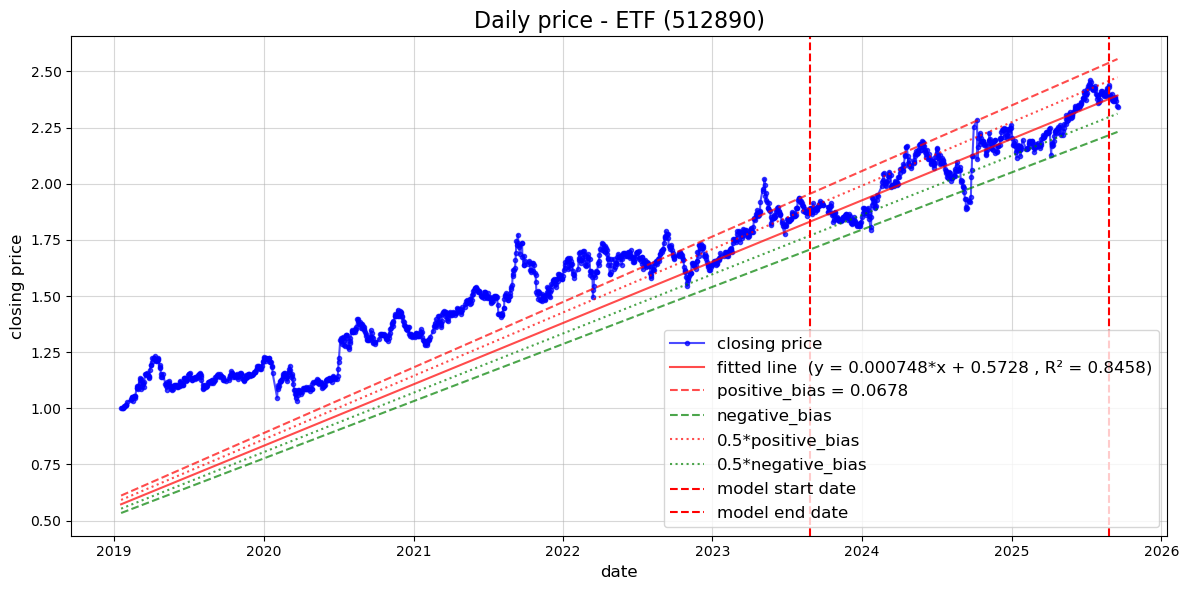

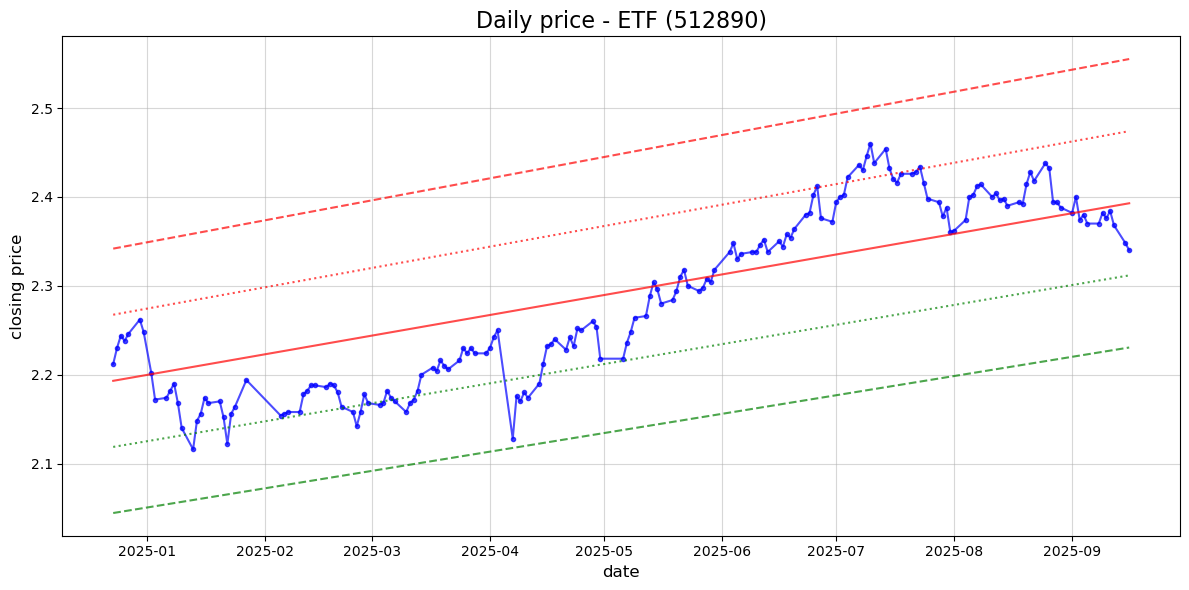

date: 2025-09-16
-----后复权------
current_price: 2.340
y_pred: 2.393
first_buy_point: 2.312 , second_buy_point: 2.231
first_sell_point: 2.474, second_sell_point: 2.555
-----前复权------
ratio_forward_over_backward: 0.500
current_price: 1.170
y_pred_f: 1.196
first_buy_point_f: 1.156 , second_buy_point_f: 1.115
first_sell_point_f: 1.237, second_sell_point_f: 1.278
-----现价买入预期收益------
return_1year: 13.93% ± 6.78% 
return_2year: 25.59% ± 6.78% , annualized_return_2year: 12.07% ± 3.39%
-----估值百分比------
valuation_percentage: 0.337


In [17]:
# fig-1 ---------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df["日期"], df["收盘"], color="blue", marker='.', label="closing price", alpha=0.7)
plt.plot(df["日期"], df["y_pred"], color="red", label=f"fitted line  (y = {slope:.6f}*x + {intercept:.4f} , R² = {r2:.4f})", alpha=0.7)
plt.plot(df["日期"], df["positive_bias"], color="red", linestyle="--", label=f"positive_bias = {bias_std:.4f}", alpha=0.7)
plt.plot(df["日期"], df["negative_bias"], color="green", linestyle="--",label="negative_bias", alpha=0.7)
plt.plot(df["日期"], 0.5*(df["y_pred"]+df["positive_bias"]), color="red", linestyle=":", label="0.5*positive_bias", alpha=0.7)
plt.plot(df["日期"], 0.5*(df["y_pred"]+df["negative_bias"]), color="green", linestyle=":",label="0.5*negative_bias", alpha=0.7)
plt.axvline(start_date, color="red", linestyle="--", label="model start date")
plt.axvline(end_date, color="red", linestyle="--", label="model end date")

plt.title("Daily price - ETF (512890)", fontsize=16)
plt.xlabel("date", fontsize=12)
plt.ylabel("closing price", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# fig-2 ---------------------------------------
plot_num = 180
plt.figure(figsize=(12, 6))
plt.plot(df["日期"].iloc[-plot_num:], df["收盘"].iloc[-plot_num:], color="blue", marker='.', label="closing price", alpha=0.7)
plt.plot(df["日期"].iloc[-plot_num:], df["y_pred"].iloc[-plot_num:], color="red", label=f"fitted line  (y = {slope:.6f}*x + {intercept:.4f} , R² = {r2:.4f})", alpha=0.7)
plt.plot(df["日期"].iloc[-plot_num:], df["positive_bias"].iloc[-plot_num:], color="red", linestyle="--", label=f"positive_bias = {bias_std:.4f}", alpha=0.7)
plt.plot(df["日期"].iloc[-plot_num:], df["negative_bias"].iloc[-plot_num:], color="green", linestyle="--",label="negative_bias", alpha=0.7)
plt.plot(df["日期"].iloc[-plot_num:], 0.5*(df["y_pred"].iloc[-plot_num:]+df["positive_bias"].iloc[-plot_num:]), color="red", linestyle=":", label="0.5*positive_bias", alpha=0.7)
plt.plot(df["日期"].iloc[-plot_num:], 0.5*(df["y_pred"].iloc[-plot_num:]+df["negative_bias"].iloc[-plot_num:]), color="green", linestyle=":",label="0.5*negative_bias", alpha=0.7)
# plt.axvline(start_date, color="red", linestyle="--", label="model start date")
# plt.axvline(end_date, color="red", linestyle="--", label="model end date")

plt.title("Daily price - ETF (512890)", fontsize=16)
plt.xlabel("date", fontsize=12)
plt.ylabel("closing price", fontsize=12)
# plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# print ---------------------------------------
print(f"date: {df['日期'].iloc[-1].date()}")
print("-----后复权------")
print(f"current_price: {latest_price_b:.3f}")
print(f"y_pred: {y_pred:.3f}")
print(f"first_buy_point: {first_buy_point:.3f} , second_buy_point: {second_buy_point:.3f}")
print(f"first_sell_point: {first_sell_point:.3f}, second_sell_point: {second_sell_point:.3f}")
print("-----前复权------")
print(f"ratio_forward_over_backward: {ratio_fob:.3f}")
print(f"current_price: {latest_price_b*ratio_fob:.3f}")
print(f"y_pred_f: {y_pred_f:.3f}")
print(f"first_buy_point_f: {first_buy_point_f:.3f} , second_buy_point_f: {second_buy_point_f:.3f}")
print(f"first_sell_point_f: {first_sell_point_f:.3f}, second_sell_point_f: {second_sell_point_f:.3f}")

print("-----现价买入预期收益------")
print(f"return_1year: {return_1year*100:>4.2f}% ± {bias_std*100:.2f}% ")
print(f"return_2year: {return_2year*100:>4.2f}% ± {bias_std*100:.2f}% , \
annualized_return_2year: {annualized_return_2year*100:>4.2f}% ± {bias_std*0.5*100:.2f}%")

print("-----估值百分比------")
print(f"valuation_percentage: {valuation_percentage:.3f}")

# 3. 数据回测

In [18]:
def max_drawdown(series):
    """
    计算最大回撤，兼容股价序列和累计收益率序列。

    参数:
    series (list or np.array): 股价序列或从0开始的累计收益率序列
    
    返回:
    max_dd (float): 最大回撤值
    """
    # 转换为数组
    series = np.array(series, dtype=float)
    
    if len(series) == 0:
        raise ValueError("输入序列不能为空。")
        
    # 判断是否为累计收益率序列
    if series.min() <= 0:
        # 累计收益率转换为净值
        net_value = 1 + series
    else:
        # 视为股价序列
        net_value = series

    # 计算峰值和回撤
    peak = np.maximum.accumulate(net_value)
    drawdown = (net_value - peak) / peak
    
    # 返回最大回撤
    max_dd = drawdown.min()
    return max_dd

In [19]:
# -------------------------------------------
# backtest_trade
# -------------------------------------------
first_bias_rate = 0.5 * bias_std

initial_balance = 100000
balance = initial_balance
position = 0 # number of shares held
position_value = 0
cash = balance

balance_curve = []         # 收益曲线
position_ratios = []       # 仓位比例
cumulative_returns = []    # 累计收益率
original_cumulative_returns = []
annualized_returns = []    # 年化收益率
original_annualized_returns = []

return_6m = None
return_1y = None

# ------------------------------------------------
# start_trade_date = start_date
start_trade_date = end_date + timedelta(days = 1)

start_index = df[df["日期"] >= start_trade_date].index[0]

initial_price = df.loc[start_index, "收盘"]

for index, row in df.iloc[start_index:].iterrows():
    current_price = row["收盘"]
    y_pred = row["y_pred"]
    bias = (current_price - y_pred) / y_pred

    # buy
    if bias < -first_bias_rate:
        if bias > -first_bias_rate * 2:
            buy_amount = (0.2 * cash) / current_price
            position += buy_amount
            cash -= buy_amount * current_price
        else:
            buy_amount = cash / current_price
            position += buy_amount
            cash -= buy_amount * current_price

    # sell
    elif bias > first_bias_rate:
        if bias < first_bias_rate * 2:
            sell_amount = position * 0.2
            position -= sell_amount
            cash += sell_amount * current_price
        else:
            cash += position * current_price
            position  = 0

    # cal profit
    position_value = position * current_price
    total_balance = cash + position_value
    balance_curve.append(total_balance)

    position_ratio = position_value / total_balance
    position_ratios.append(position_ratio)

    cumulative_return = total_balance / initial_balance - 1
    cumulative_returns.append(cumulative_return)

    original_cumulative_return = current_price / initial_price - 1
    original_cumulative_returns.append(original_cumulative_return)
        
    days_elapsed = (row["日期"] - start_trade_date).days + 1

    annualized_return = (1 + cumulative_return) ** (365 / days_elapsed) - 1
    annualized_returns.append(annualized_return)

    original_annualized_return = (1 + original_cumulative_return) ** (365 / days_elapsed) - 1
    original_annualized_returns.append(original_annualized_return)

    if return_6m is None and days_elapsed >= 182:
        return_6m = cumulative_return
    if return_1y is None and days_elapsed >= 365:
        return_1y = cumulative_return

if return_6m is None:
    return_6m = 0
if return_1y is None:
    return_1y = 0

strategy_max_drawdown = max_drawdown(cumulative_returns)
original_max_drawdown = max_drawdown(original_cumulative_returns)

# 显示关键指标
final_balance = balance_curve[-1]
print(f"总交易天数: {days_elapsed}")
print(f"最终收益: {final_balance:.2f}")
print(f"半年收益率: {return_6m * 100:>6.2f}%, 一年收益率: {return_1y * 100:>6.2f}%")
print(f"累计收益率: {cumulative_returns[-1] * 100:>6.2f}%, 净值累计收益率: {original_cumulative_returns[-1] * 100:>6.2f}%")
print(f"年化收益率: {annualized_returns[-1] * 100:>6.2f}%, 净值年化收益率: {original_annualized_returns[-1] * 100:>6.2f}%")
print(f"最大回撤: {strategy_max_drawdown * 100:.2f}%, 净值最大回撤: {original_max_drawdown * 100:.2f}%")

总交易天数: 20
最终收益: 100000.00
半年收益率:   0.00%, 一年收益率:   0.00%
累计收益率:   0.00%, 净值累计收益率:  -2.26%
年化收益率:   0.00%, 净值年化收益率: -34.06%
最大回撤: 0.00%, 净值最大回撤: -2.50%


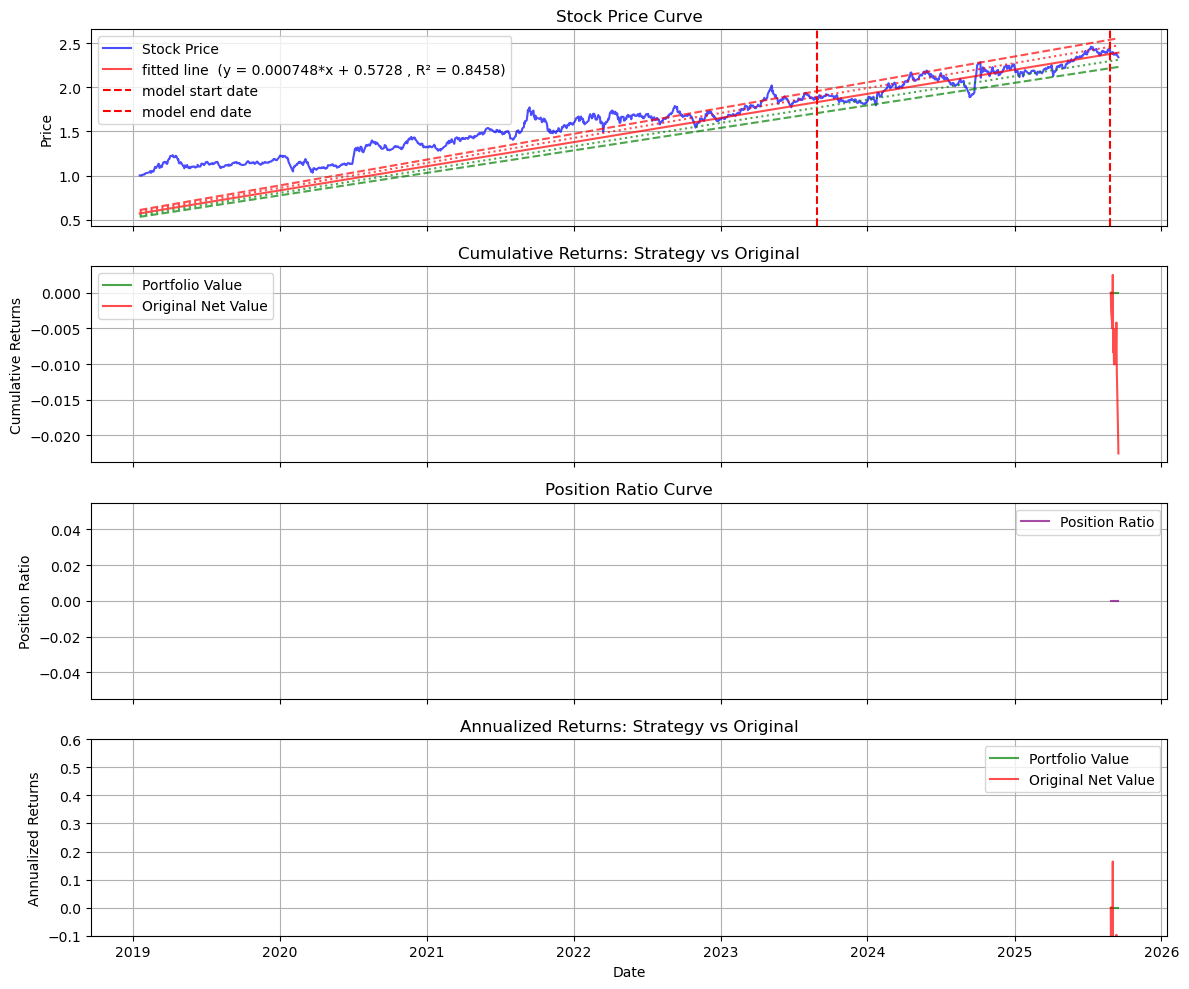

总交易天数: 20
最终收益: 100000.00
半年收益率:   0.00%, 一年收益率:   0.00%
累计收益率:   0.00%, 净值累计收益率:  -2.26%
年化收益率:   0.00%, 净值年化收益率: -34.06%
最大回撤: 0.00%, 净值最大回撤: -2.50%


In [20]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# 子图1：股价曲线
axes[0].plot(df["日期"], df["收盘"], label="Stock Price", color="blue", alpha=0.7)
axes[0].plot(df["日期"], df["y_pred"], color="red", label=f"fitted line  (y = {slope:.6f}*x + {intercept:.4f} , R² = {r2:.4f})", alpha=0.7)
axes[0].plot(df["日期"], df["positive_bias"], color="red", linestyle="--", alpha=0.7)
axes[0].plot(df["日期"], df["negative_bias"], color="green", linestyle="--", alpha=0.7)
axes[0].plot(df["日期"], 0.5*(df["y_pred"]+df["positive_bias"]), color="red", linestyle=":", alpha=0.7)
axes[0].plot(df["日期"], 0.5*(df["y_pred"]+df["negative_bias"]), color="green", linestyle=":", alpha=0.7)
axes[0].axvline(start_date, color="red", linestyle="--", label="model start date")
axes[0].axvline(end_date, color="red", linestyle="--", label="model end date")
axes[0].set_title("Stock Price Curve")
axes[0].set_ylabel("Price")
axes[0].grid()
axes[0].legend()

# 子图2：收益曲线
axes[1].plot(df.iloc[start_index:]["日期"], cumulative_returns, label="Portfolio Value", color="green", alpha=0.7)
axes[1].plot(df.iloc[start_index:]["日期"], original_cumulative_returns, label="Original Net Value", color="red", alpha=0.7)
axes[1].set_title("Cumulative Returns: Strategy vs Original")
axes[1].set_ylabel("Cumulative Returns")
axes[1].grid()
axes[1].legend()

# 子图3：仓位比例曲线
axes[2].plot(df.iloc[start_index:]["日期"], position_ratios, label="Position Ratio", color="purple", alpha=0.7)
axes[2].set_title("Position Ratio Curve")
axes[2].set_ylabel("Position Ratio")
axes[2].grid()
axes[2].legend()

# 子图4：年化收益曲线
axes[3].plot(df.iloc[start_index:]["日期"], annualized_returns, label="Portfolio Value", color="green", alpha=0.7)
axes[3].plot(df.iloc[start_index:]["日期"], original_annualized_returns, label="Original Net Value", color="red", alpha=0.7)
axes[3].set_title("Annualized Returns: Strategy vs Original")
axes[3].set_ylabel("Annualized Returns")
axes[3].set_xlabel("Date")
axes[3].set_ylim(-0.1, 0.6)
axes[3].grid()
axes[3].legend()

# 调整布局
plt.tight_layout()
plt.show()

# 显示关键指标
final_balance = balance_curve[-1]
print(f"总交易天数: {days_elapsed}")
print(f"最终收益: {final_balance:.2f}")
print(f"半年收益率: {return_6m * 100:>6.2f}%, 一年收益率: {return_1y * 100:>6.2f}%")
print(f"累计收益率: {cumulative_returns[-1] * 100:>6.2f}%, 净值累计收益率: {original_cumulative_returns[-1] * 100:>6.2f}%")
print(f"年化收益率: {annualized_returns[-1] * 100:>6.2f}%, 净值年化收益率: {original_annualized_returns[-1] * 100:>6.2f}%")
print(f"最大回撤: {strategy_max_drawdown * 100:.2f}%, 净值最大回撤: {original_max_drawdown * 100:.2f}%")